# Top box office movies analysis

## 為何選擇分析這些資料?
想了解電影票房和電影的評價是否有實質的關係

## 從資料中觀察到的現象
在蒐集全球票房前50高的電影後，比對 IMDb 對這些電影的評分

                          title  rating
0                        Avatar     7.8
1                       Titanic     7.8
2  Star Wars: The Force Awakens     8.0
3        Avengers: Infinity War     8.7
4                Jurassic World     7.0


Text(0,0.5,'box office')

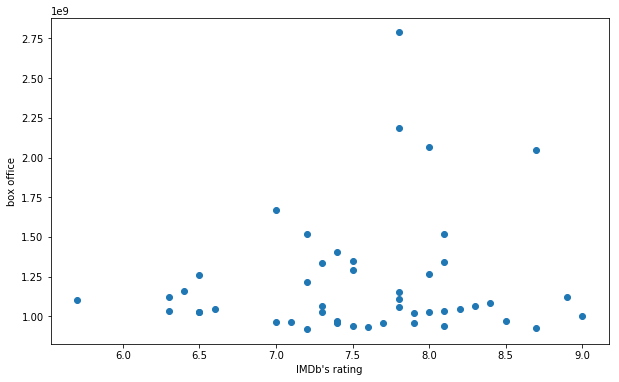

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from requests_html import HTMLSession
%matplotlib inline

def change_money(str):
    try:
        money = int(str.replace(',', ''))
        return money
    except Exception as e:
        str = str.replace(',', '')
        for i in str:
            if i.isalpha():
                str.replace(i, '')
                
''' get ranking list '''
wiki_url = 'https://en.wikipedia.org/wiki/List_of_highest-grossing_films'
session = HTMLSession()
response = session.get(wiki_url)
titles = response.html.find('.wikitable')[0].find('i')
ranking_list = []
for title in titles:
    ranking_list.append(title.text)

''' get IMDb data '''
api_key = '2455a527'
year = ''
plot = 'full'

IMDb_rating = []
for title in ranking_list:
    url = 'http://www.omdbapi.com/?t=' + title + '&y=' + year + 'plot=' + plot + '&apikey=' + api_key
    r = requests.get(url)
    try:
        data = json.loads(r.text)
        score = data['Ratings'][0]['Value']
        score = str(score).split('/')[0]
        score = float(score)
        IMDb_rating.append(score)
    except Exception as e:
        IMDb_rating.append(None)

''' using pandas '''
movie_series = pd.Series(ranking_list, index=IMDb_rating)

dict = {'title': ranking_list, 'rating': IMDb_rating}
movie_frame = pd.DataFrame(dict)
print(movie_frame.head())

''' money list '''
money_list = []
box_office = response.html.find('.wikitable')[0].find('tbody [align=right]')
# print(box_office)
for money in box_office:
    m = change_money(money.text.split('$')[1])
    money_list.append(m)
# print(money_list)

plt.figure(figsize=(10, 6))
plt.scatter(movie_frame['rating'], money_list)
plt.xlabel('IMDb\'s rating')
plt.ylabel('box office')
# plt.show()

## Average : 6.39  https://www.quora.com/What-is-an-average-rating-on-IMDB-for-a-movie

([<matplotlib.axis.XTick at 0x52e4910>,
 <a list of 10 Text xticklabel objects>)

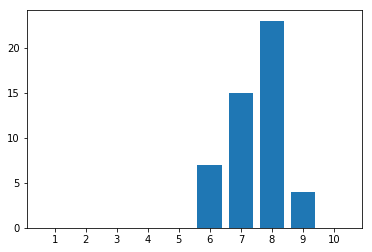

In [8]:
ranking_statistics = [0] * 10
# print(IMDb_rating)
for rating in IMDb_rating:
    try:                                         # in case of None value
        # rating_int = int(rating)
        rating_int = round(rating)
        ranking_statistics[rating_int - 1] += 1
    except Exception as e:
        pass
rate = list(range(1, 11))
plt.bar(rate, ranking_statistics)
plt.xticks(rate, rate)